In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Define folders containing the CSV files
folder = '/content/drive/MyDrive/'

In [50]:

num_files_to_load = 2  # Adjust this number to load the desired amount

# Initialize a list to store loaded DataFrames
dataframes = []

# Counter to keep track of loaded files
count = 0

for filename in os.listdir(folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder, filename)

        df = pd.read_csv(file_path, engine='python')

        columns_to_drop = ['datetime', 'user yes/no', 'compulsive', 'urge', 'tense']
        #df = df[(df['ignore' == 0])]
        df = df.drop(columns=columns_to_drop)
        dataframes.append(df)
        count += 1

        # Check if the desired number of files has been loaded
        if count >= num_files_to_load:
            break

In [51]:
filtered_dfs = [df[df['ignore'] == 0].copy() for df in dataframes if 'ignore' in df.columns and (df['ignore'] == 0).any()]

In [52]:
combined_df = pd.concat(filtered_dfs)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885008 entries, 0 to 2971990
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  float64
 1   acc x      float64
 2   acc y      float64
 3   acc z      float64
 4   gyro x     float64
 5   gyro y     float64
 6   gyro z     float64
 7   ignore     int64  
 8   relabeled  int64  
dtypes: float64(7), int64(2)
memory usage: 220.1 MB


In [53]:

columns_for_clustering = ['timestamp', 'relabeled', 'acc x', 'acc y', 'acc z']
data_for_clustering = combined_df[columns_for_clustering].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

num_clusters = 3


In [54]:
features = data_for_clustering[['timestamp', 'relabeled']]

In [55]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [56]:
fig = px.scatter(pc_df, x='PC1', y='PC2', title='PCA Analysis for Handwashing Behavior')
fig.update_layout(
    xaxis=dict(type='linear'),
    yaxis=dict(type='linear'),
    title='PCA Analysis for Handwashing Behavior'
)


In [57]:
fig.show()

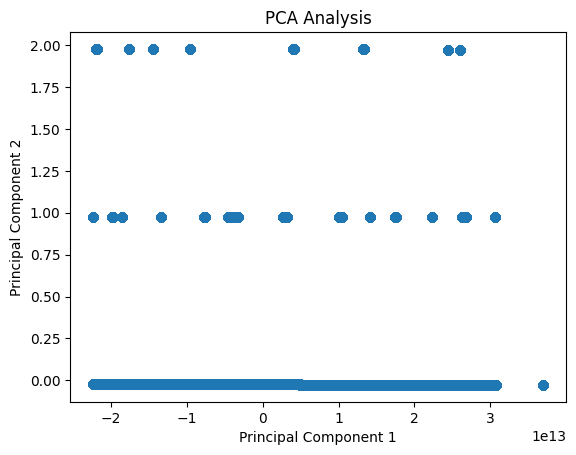

In [58]:
# Visualize the results
plt.scatter(pc_df['PC1'], pc_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis')
plt.show()

In [36]:

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_for_clustering['cluster'] = kmeans.fit_predict(data_for_clustering)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



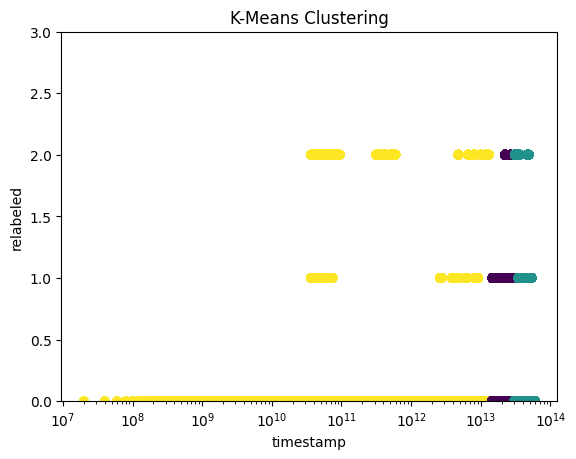

In [37]:
plt.scatter(data_for_clustering['timestamp'], data_for_clustering['relabeled'], c=data_for_clustering['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xscale('log')  # Adjust these values based on your data
plt.ylim(0, 3)
plt.xlabel('timestamp')
plt.ylabel('relabeled')
plt.show()


In [59]:
eps = 0.5
min_samples = 5
# Use DBSCAN for clustering
model = DBSCAN(eps=eps, min_samples=min_samples)
clusters = model.fit_predict(data_for_clustering)

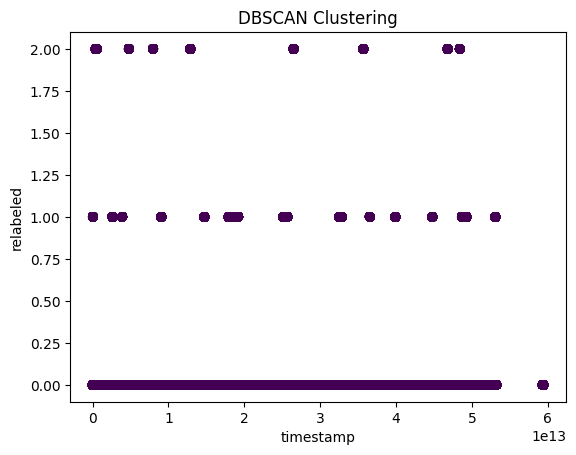

In [60]:
plt.scatter(data_for_clustering['timestamp'], data_for_clustering['relabeled'], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('timestamp')
plt.ylabel('relabeled')
plt.show()